2019-02
2019-03


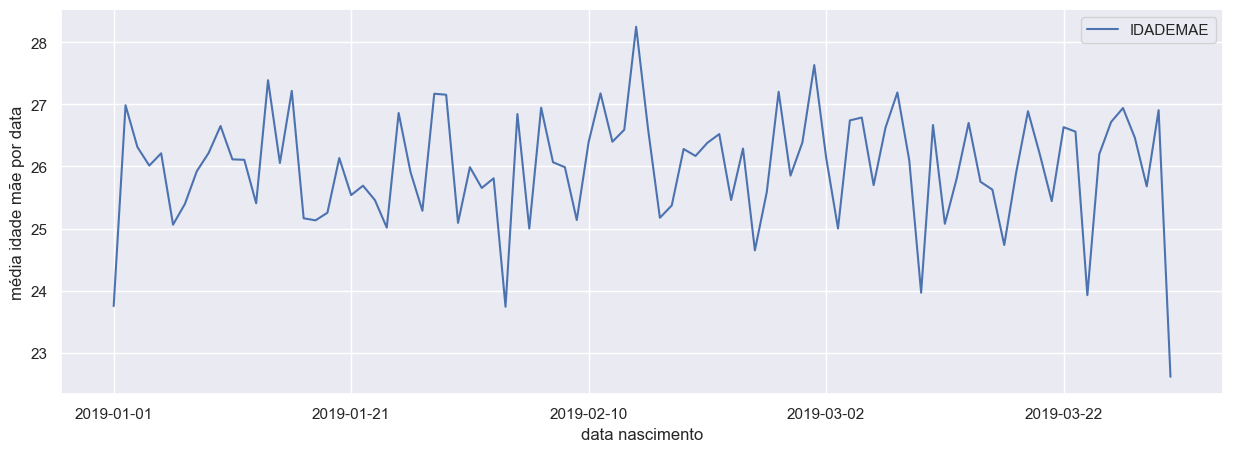

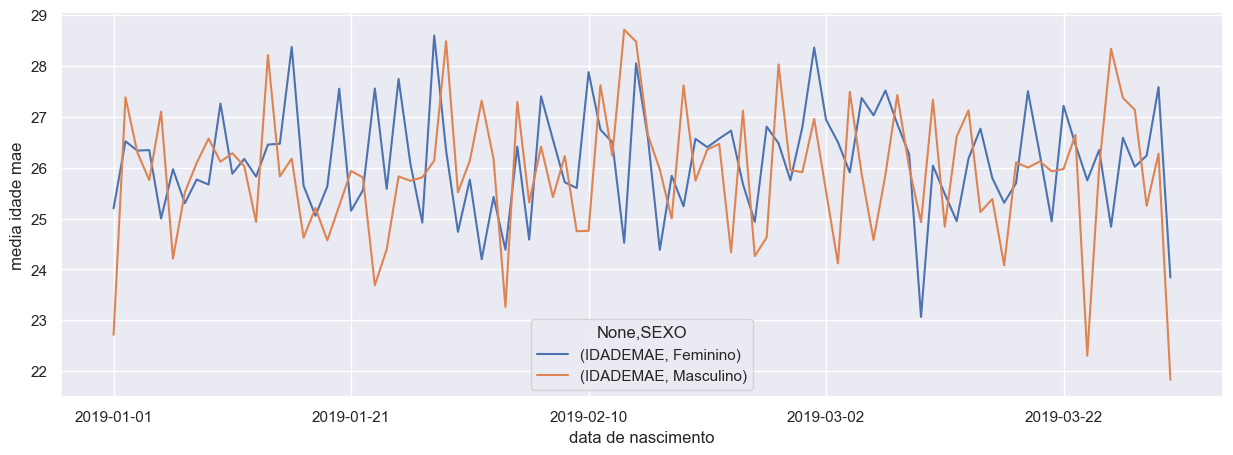

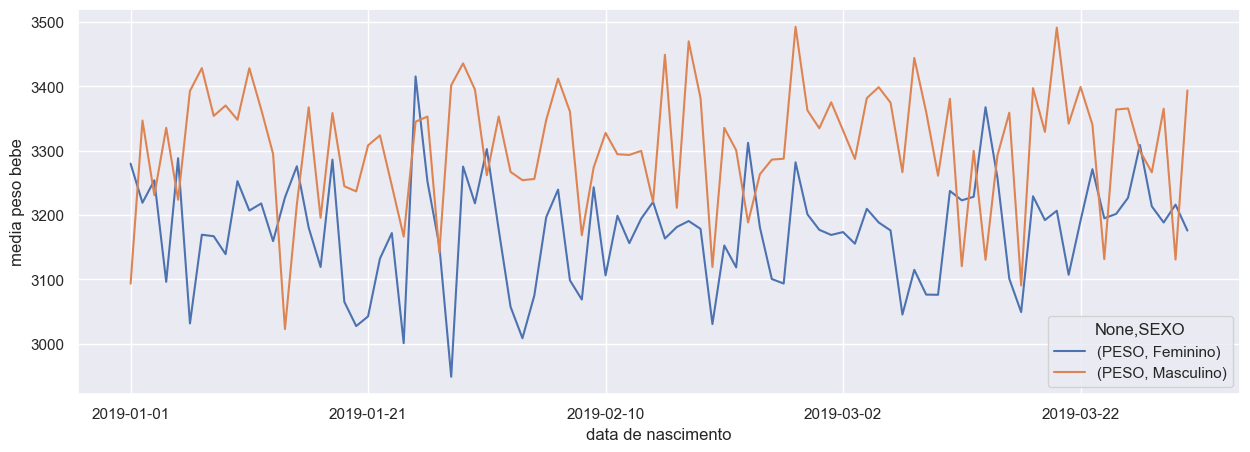

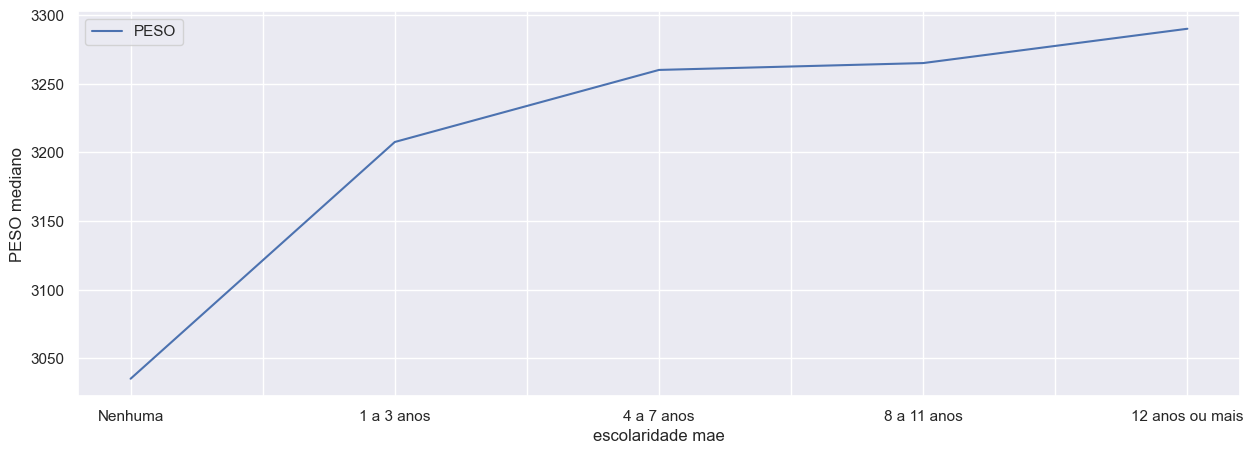

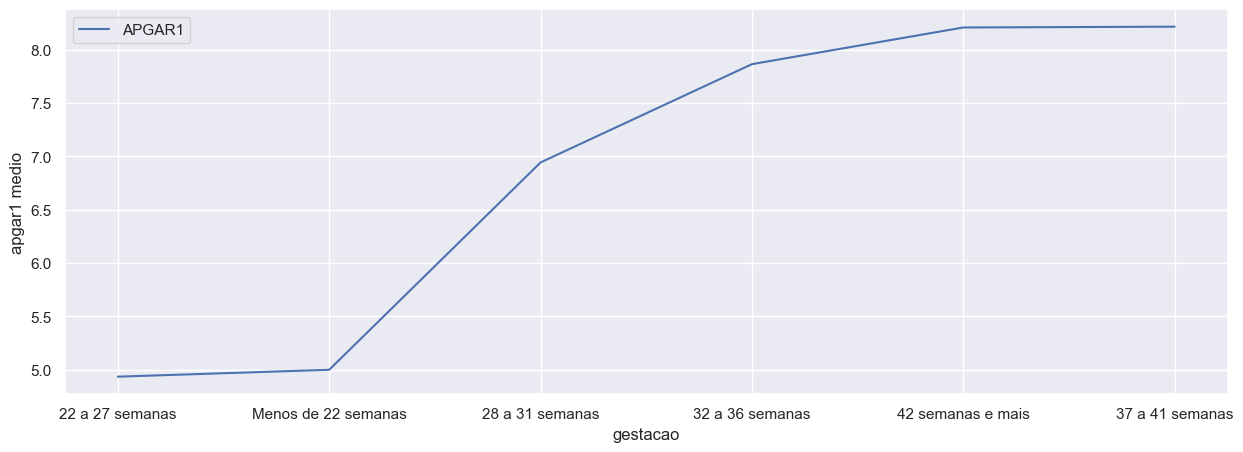

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys

sns.set()  

def plota_pivot_table(df, value, index, func, ylabel, xlabel, opcao='nada'):
    if opcao == 'nada':
        pd.pivot_table(df, values=value, index=index,aggfunc=func).plot(figsize=[15, 5])
    elif opcao == 'unstack':
        pd.pivot_table(df, values=value, index=index,aggfunc=func).unstack().plot(figsize=[15, 5])
    elif opcao == 'sort':
        pd.pivot_table(df, values=value, index=index,aggfunc=func).sort_values(value).plot(figsize=[15, 5])
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    return None
    
# meses = ['JAN','FEV','MAR','ABR','MAI','JUN','JUL','AGO','SET','OUT','NOV','DEZ']
max_data=''
sinasc=''
def meses(*args):
    # meses = ['JAN', 'FEV', 'MAR', 'ABR', 'MAI', 'JUN', 'JUL', 'AGO', 'SET', 'OUT', 'NOV', 'DEZ']
    global max_data, sinasc
    sys.argv = args
    mes = sys.argv
    for args in mes:
        sinasc = pd.read_csv(f'./input/SINASC_RO_2019_{args}.csv')
        # max_data = args
        max_data = sinasc.DTNASC.max()[:7]
        print(max_data)
meses('FEV','MAR')    
    
os.makedirs('./output/figs/'+max_data, exist_ok=True)

plota_pivot_table(sinasc, 'IDADEMAE', 'DTNASC', 'mean', 'média idade mãe por data', 'data nascimento')
plt.savefig('./output/figs/'+max_data+'/media idade mae por data.png')

plota_pivot_table(sinasc, 'IDADEMAE', ['DTNASC', 'SEXO'], 'mean', 'media idade mae','data de nascimento','unstack')
plt.savefig('./output/figs/'+max_data+'/media idade mae por sexo.png')

plota_pivot_table(sinasc, 'PESO', ['DTNASC', 'SEXO'], 'mean', 'media peso bebe','data de nascimento','unstack')
plt.savefig('./output/figs/'+max_data+'/media peso bebe por sexo.png')

plota_pivot_table(sinasc, 'PESO', 'ESCMAE', 'median', 'PESO mediano','escolaridade mae','sort')
plt.savefig('./output/figs/'+max_data+'/PESO mediano por escolaridade mae.png')

plota_pivot_table(sinasc, 'APGAR1', 'GESTACAO', 'mean', 'apgar1 medio','gestacao','sort')
plt.savefig('./output/figs/'+max_data+'/media apgar1 por gestacao.png')

### O QUE PODERIA SER FEITO PARA MELHORAR:
Acho que para esse bloco de codigo essa automatização está perfeita. Mas se houver um pedido de um mês especifico acho que um input resolveria tudo.
input: "mes que escolhido em numérico: 5"
na minha opinião, além do input acho que não tem mais nada para melhorar, dessa forma está muito bom.

In [34]:
def meses(*args):
    # meses = ['JAN', 'FEV', 'MAR', 'ABR', 'MAI', 'JUN', 'JUL', 'AGO', 'SET', 'OUT', 'NOV', 'DEZ']
    sys.argv = args
    mes = sys.argv
    for args in mes:
        # sinasc = pd.read_csv(f'./input/SINASC_RO_2019_{args}.csv')
        max_data = args
        # max_data = sinasc.DTNASC.max()[:7]
        print(max_data)

In [35]:
meses('FEV', 'MAR')

FEV
MAR
